# Assignment 1
_Social graphs and interactions (02805)_

In [134]:
# Global imports
import numpy as np
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as plt
import networkx as nx
import networkx.generators.random_graphs as rg
import random
import seaborn as sns
import pandas as pd

## Part 1: Binning degree distributions

### A. Binning real numbers

1. Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [135]:
random_generator = np.random.default_rng(42)

mean = 2
standard_deviation = 0.125
number_of_data_points = 5000

random_data_points = random_generator.normal(mean, standard_deviation, number_of_data_points)

2. Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

> `numpy.histogram` returns a tuple of arrays. The first one contains the count of values per bin, the second array contains the boundaries of the bins. They do not have the same length as the second array contains one more boundary than there are bins.

In [136]:
number_of_bins = 10
histogram = np.histogram(random_data_points, number_of_bins)

print(f"Length of 1st histogram array: {len(histogram[0])}")
print(f"Length of 2st histogram array: {len(histogram[1])}")

Length of 1st histogram array: 10
Length of 2st histogram array: 11


3. Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

> As the bin-array contains 2 boundaries (left and right) for each bin it has one more boundary than the count-array (the right boundary of the preceding count-value being the left boundary of the next count-value). In order to use the `plot()` method the bin-value on the very right is discarded by using `[:-1]`. However, another solution would be to create a new array with values being the mean of their preceding and succeeding value of the existing boundaries.

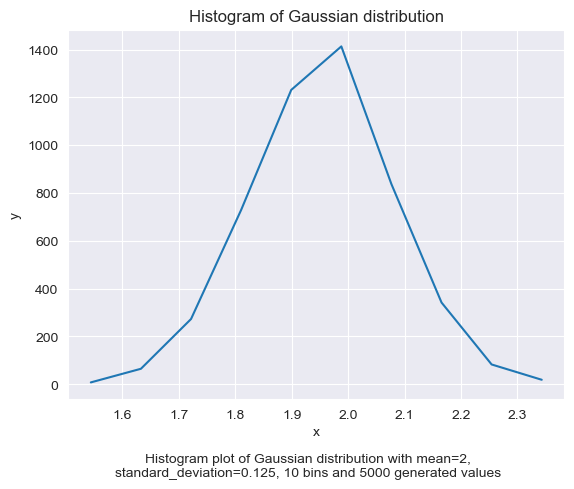

In [137]:
x_values = histogram[1][:-1]
y_values = histogram[0]

plt.plot(x_values, y_values)
plt.title(f'Histogram of Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Gaussian distribution with mean={mean},\nstandard_deviation={standard_deviation}, {number_of_bins} bins and {number_of_data_points} generated values", ha='center')
plt.show()

### B. Binning integers

1. But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [138]:
poisson_lambda = 10
number_of_data_points = 5000

random_poisson_data_points = np.random.poisson(poisson_lambda, number_of_data_points)
random_poisson_max_value = max(random_poisson_data_points)
random_poisson_min_value = min(random_poisson_data_points)

print(f'Maximum value of poisson distributed values: {random_poisson_max_value}')
print(f'Minimum value of poisson distributed values: {random_poisson_min_value}')

Maximum value of poisson distributed values: 22
Minimum value of poisson distributed values: 1


2. Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

> The min-value of the Poisson distribution acts as the left boundary of the first bin (including the `min-value` counts but excluding `min-value` $+ 1$ counts), the `max-value` of the Poisson distribution acts as the righthand-most bin boundary. It includes the `max_value` counts *and* `max_value` $-1$ counts.

In [139]:
# +2 because the value of the stop parameter of range() is exclusive
v = np.array(range(random_poisson_min_value, random_poisson_max_value + 2))

histogram = np.histogram(random_poisson_data_points, bins=v)

sum_over_bin_counts = sum(histogram[0])
print(f'Sum over bin counts: {sum_over_bin_counts}')

Sum over bin counts: 5000


3. Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

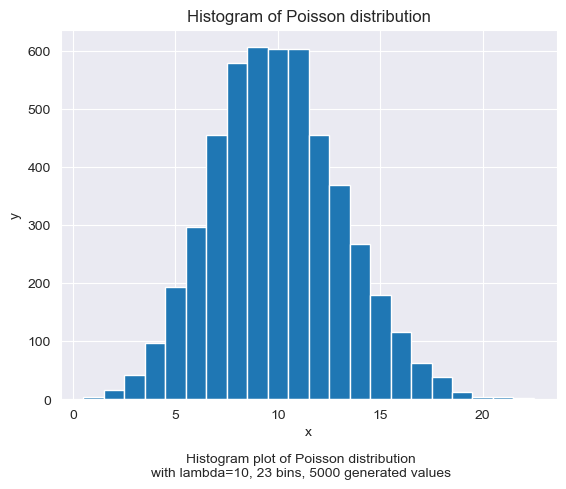

In [140]:
x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of Poisson distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Poisson distribution\nwith lambda={poisson_lambda}, {len(v)} bins, {number_of_data_points} generated values", ha='center')
plt.show()

### C. Binning and plotting degree distributions

1. Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? **Hint**: The parameter $ \lambda $ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

> The following calculation finds $p$:

$$\lambda = \langle k \rangle = p(N-1)$$
$$\text{ with } \lambda = 10; N = 5000 \Rightarrow 10 = p(5000 - 1)$$
$$p = 10 / 4999 \approx 0.002$$

In [141]:
N = 5000
p = 10 / 4999

2. Now, use `networkx` to create the graph and extract the degree distribution.

In [142]:
import networkx as nx

er_network = nx.erdos_renyi_graph(N, p)

3. Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

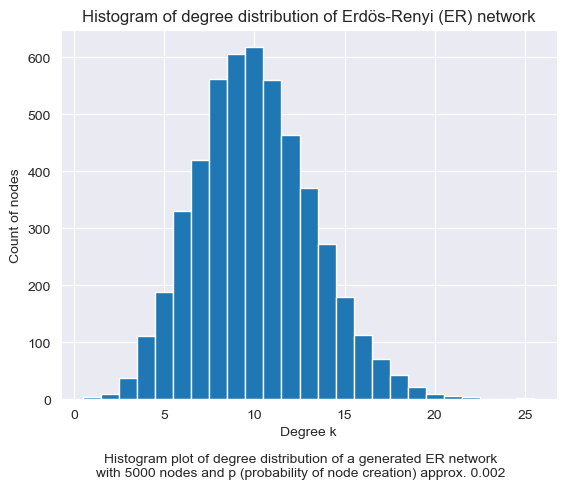

In [143]:
degrees = [degree for (node, degree) in list(er_network.degree())]

er_min_degree = min(degrees)
er_max_degree = max(degrees)

# +2 because the stop parameter of range() is excluded
v = np.array(range(er_min_degree, er_max_degree + 2))

histogram = np.histogram(degrees, bins=v)

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of degree distribution of Erdös-Renyi (ER) network')
plt.xlabel("Degree k")
plt.ylabel("Count of nodes")
plt.figtext(.5,-0.05, f"Histogram plot of degree distribution of a generated ER network\nwith {N} nodes and p (probability of node creation) approx. {p:.3f}", ha='center')
plt.show()

## Part 2: Random networks and plotting in `networkx`

### A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

* Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.

* What is the expected number of links, $〈L〉$?

The maximum number of links $L_{max}$  is computed using the following formula: 

$L_{max} = \frac{N(N-1)}{2}$

Given the probability $p = 10^{–3}$ of nodes connected to each other we can computed the expected number of links:

In [144]:
N = 3000 # number of nodes
p = 1e-3 # probability of nodes being connected
(L) = (p * N * (N - 1)) / 2
print('expected number of links <L>:', (L))

expected number of links <L>: 4498.5


* In which regime is the network?

The regime can easily be tested given *N* and *p* as follows:

In [145]:
print("Subcritical Regime: ", p < 1 / N)
print("Critical Point: ", p == 1 / N)
print("Supercritical Regime: ", p > 1 / N)
print("Connected Regime: ", p > np.log(N) / N)

Subcritical Regime:  False
Critical Point:  False
Supercritical Regime:  True
Connected Regime:  False


Thus, it can be said that the network is in the supercritical regime. Having one gaint component where numerous isolated components coexist with the gaint component - the supercritical regime lasting until all nodes are absorbed by the gaint component.

* Calculate the probability $p_{c}$ so that the network is at the critical point.

The probability $p_{c}$ so that the network is at the critical point is computed using the following formula: $p = \frac{1}{(N-1)}$

In [146]:
p_c = 1 / (N - 1)
print('Critical Point:', p_c)

Critical Point: 0.00033344448149383126


* Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

The number of nodes $N^{cr}$ given the linking probability $p = 10^{–3}$ is computed using scipy.optimize in order to satisfy the equation $p = \frac{ln(N)}{N}$ so that the network is within the connected regime (having only one component):

In [147]:
# first the equation is defined as a funtion of N
def ncr_connected(N):
    p = 1e-3
    y = (np.log(N) / N) - p
    return y

y_guess = 10000 # guess
ncr = fsolve(ncr_connected, y_guess) # 
print("Number of nodes (Ncr): ", ncr)

Number of nodes (Ncr):  [9118.0064704]


Thus, given the linking probability $p = 10^{–3}$ the number of nodes is ~ 9118 so that the network is within the connected regime (having only one component).

* For the network in (d), calculate the average degree  $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$.

The average degree $〈k^{cr}〉$ is computed using the following formula: 

$〈k^{cr}〉 = p_{cr}\cdot(N_{cr}-1)$

and the average distance $〈d〉$ between two randomly chosen nodes is computed using the following formula:

$〈d〉 = \frac{ln(N)}{ln(〈k^{cr}〉)}$

In [148]:
kcr = p*(ncr - 1)
print("<k_cr>:", kcr)

d = np.log(ncr) / np.log(kcr)
print("<d>:", d)

<k_cr>: [9.11700647]
<d>: [4.12553061]


Thus, the average degree $〈k^{cr}〉$ is ~ 9.1170 and the average distance between two randomly chosen nodes $〈d〉$ is ~ 4.1255.

* Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The degree distribution $p_k$ of the network is approximated using the possion form:

$p_k = e^{-〈k〉} \frac{〈d〉^k}{k!}$

pk: [0.13165633]


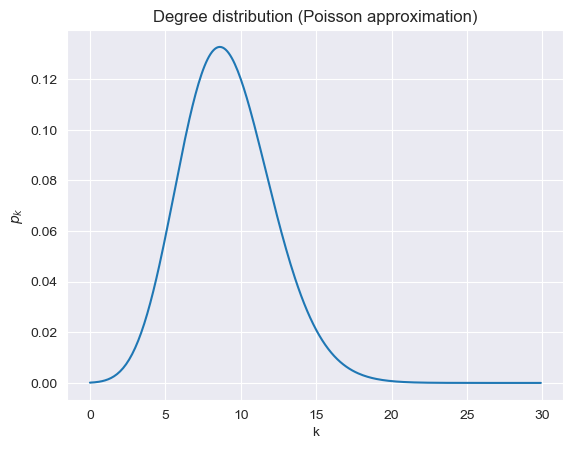

In [149]:
k = p * (ncr - 1)

k = int(k)
pk = np.exp(-kcr) * (kcr**k / np.math.factorial(k))

print("pk:", pk)

t = np.arange(0, 30, 0.1)
d = np.exp(-kcr)*np.power(kcr, t)/factorial(t)
plt.title("Degree distribution (Poisson approximation)")
plt.ylabel("$p_{k}$")
plt.xlabel("k")
plt.plot(t, d)
plt.show()

The degree distribution is shown in the plot above with it's peak around $〈k^{cr}〉 \approx 9.1170$ and $p_{k} \approx 0.13$.

### B. Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

Given $N = 200$ and $〈k〉 = 1.5$ the probability $p$ which we need is computed using the following formula:

$〈k〉 = p(N - 1) \Leftrightarrow p = \frac{〈k〉}{p(N-1)}$

In [150]:
# computing p using the given variables and the formula
N = 200
k_avg = 1.5
p = k_avg / (N - 1)

Next the random network is generated and plotted using `networkx`

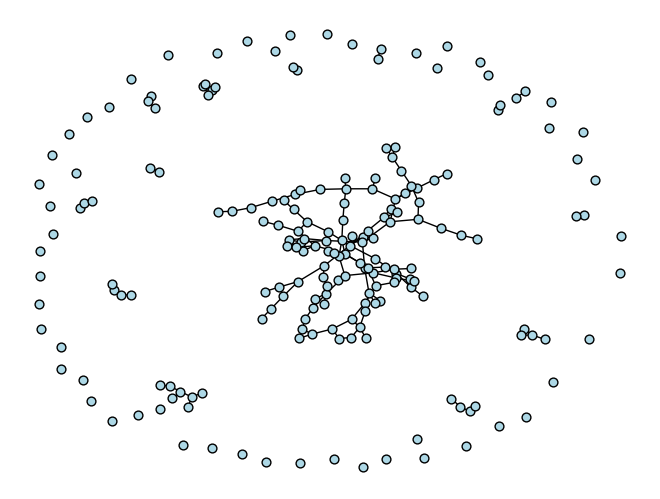

In [151]:
RG = rg.gnp_random_graph(N, p, seed=24, directed=False) # generate random network

# style arguments
options = {
   'node_size': 40,
   'node_shape': 'o',
   'edgecolors': 'black' 
}

nx.draw(RG, node_color = 'lightblue', **options) # plot the network
plt.show()

One giant connected component and multiple smaller components with fewer connections is seen in the generated random network plot shown above as well as many unconnected nodes.

* Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

The Giant Connected Component (GCC) is extracted by first getting the nodes of the largest component using `networkx.max(nx.connected_components(G)` and then by creating a subgraph of said nodes `G.subgraph(c).copy()`

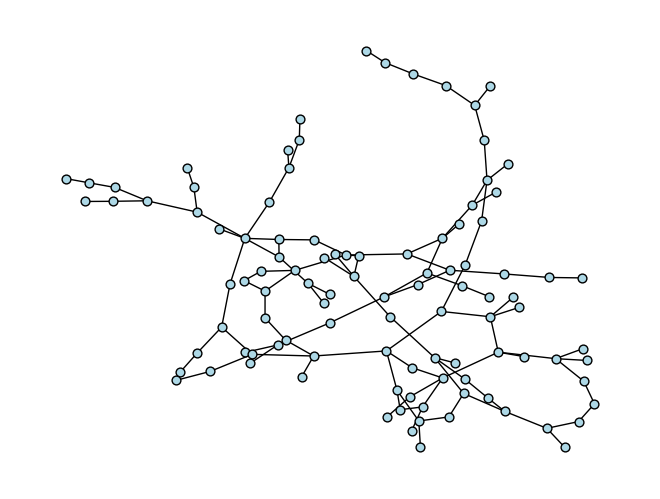

In [152]:
largest_cc = max(nx.connected_components(RG), key=len) # get nodes of largest component
GCC = RG.subgraph(largest_cc).copy() # create GCC as a copy of the subgraph largest_cc

# plot giant connected component
nx.draw(GCC, node_color = 'lightblue', **options) 
plt.show()

* Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

Then a random node is chosen using `random.choice`

In [153]:
GCC_nodes = list(GCC.nodes) # create list of nodes
random_node = random.choice(GCC_nodes) # chose a random node from the list of nodes
print("Chosen random node:", random_node)

Chosen random node: 158


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

The *length* to each from the randomly chosen node is then computed using `networkx.single_source_shortest_path_length`

In [154]:
length = nx.single_source_shortest_path_length(GCC, random_node)

Next one can find and print all nodes that are precisely 2 steps away from the chosen node

In [155]:
def get_nodes_with_length(d, val):
    return [key for key, value in d.items() if value == val]

nodes = get_nodes_with_length(length, 2)
print("nodes that are precisely 2 steps away from the chosen node:", nodes)

nodes that are precisely 2 steps away from the chosen node: [67]


* Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

Using the previously created dict containing nodes and lengths from the source (randomly chosen node) a color map can be created

In [156]:
color_map = []
for node in GCC: # for each node in the giant connected component
    if length[node] == 0: # starting node
        color_map.append("#000000") 
    elif length[node] == 2: # nodes 2-steps away
        color_map.append("#ff0000") 
    else: # all other nodes
        color_map.append("#A0CBE2")

Then, the graph is plotted using the color map

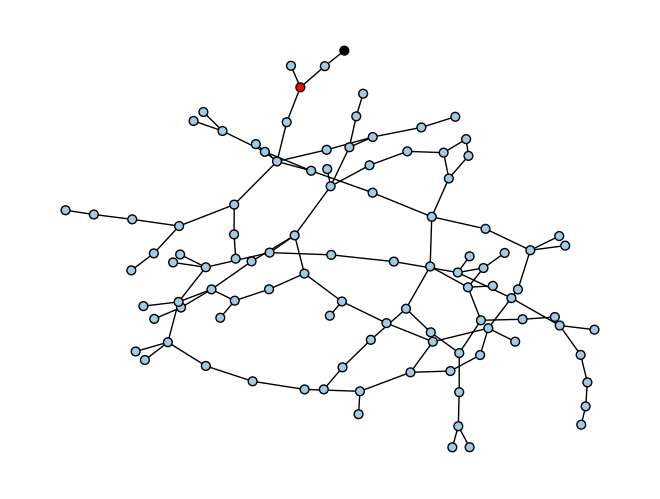

In [157]:
nx.draw(GCC, node_color = color_map, **options)
plt.show()

The plot above show the Giant Connected Component from the generated random network with the randomly chosen node colored black and nodes that are precisely 2 steps away from the chosen node colored red.

## Part 3: Watts-Strogatz Networks

### A.

We generate 3 watts-Strogatz graphs, 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1 in the following code cells:

1. p = 0, 2. p = 0.1 and 3. p = 1

In [158]:
# Define the 3 graphs
watts_strogatz1 = nx.watts_strogatz_graph(500,4,0)
watts_strogatz2 = nx.watts_strogatz_graph(500,4,0.1)
watts_strogatz3 = nx.watts_strogatz_graph(500,4,1)

Then we calculate the average shortest path length by the built in function average_shortest_path_length of networkx

In [159]:
# Compute average shortest path length
shortestpath = {'WS_p=0': [nx.average_shortest_path_length(watts_strogatz1)], 
                'WS_p=0.1': [nx.average_shortest_path_length(watts_strogatz2)], 
                'WS_p=1': [nx.average_shortest_path_length(watts_strogatz3)], 

}
print(pd.DataFrame(shortestpath, index=["Average shortest path length"]))

                                 WS_p=0  WS_p=0.1    WS_p=1
Average shortest path length  62.875752   8.29576  4.749699


The average shortest path length for each p is seen in the dataframe printed above.

Q: What happens as p = 1?

A:  P equals the probability of rewiring each edge, i.e. that one link will be rewired. When p is zero it is a regular network with high clustering coefficient and high path length. However as we increase p we add some randomness to the network and decrease both the clustering coefficient and the path length. As p ranges from 0 to 1, when p = 1 we have a fully random network. 

### B.

We want to understand the behavior the WS model a bit better as we increase p. This is achieved by generating 50 different networks with N = 500, k=4 and p={0, 0.01, 0.03, 0.05, 0.1, 0.2} and afterwards plot the average average shortest path length d and the SD to see how fast d decreases.

In [160]:
# Define networks
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
df = pd.DataFrame(np.zeros((50, len(p))),columns=[str(x) for x in p])

# Compute avarage average shortest path length for all 50x6 graphs
for i in range(len(p)):
    for j in range(0,50):
        df.loc[j,str(p[i])] = nx.average_shortest_path_length(nx.watts_strogatz_graph(500,4,p[i]))


Text(0.5, 1.0, 'Figure 1. Average d and standard deviation for each p')

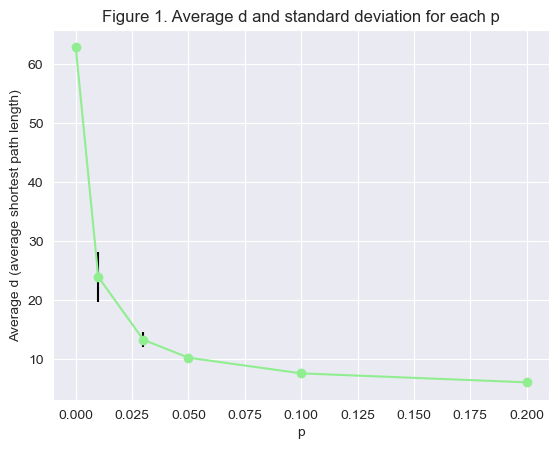

In [161]:
# Plot d and std for p
plt.errorbar(p, df.mean(axis=0), df.std(),color='lightgreen', ecolor='black',fmt='-o',)
plt.xlabel("p")
plt.ylabel("Average d (average shortest path length)")
plt.title("Figure 1. Average d and standard deviation for each p")

In Figure 1 seen above, we see the average d (taken over 50 networks) and the standard deviation for each value of p. The figure shows, that there is a large decrease in d going from no rewiring(p=0) to a little rewiring(p=0.01). However as we increase p we see a smaller and smaller decrease in d.

## Part 4. The Barabasi-Albert Model

### A.  Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [162]:
import itertools
import random

def createBAmodel(n):
    """
    n: Number of nodes

    Steps: 
    1. Start with small network
    2. Place a new node next to the network
    3. Add a link between new node and one selected node from the network  with probability proportional to it's degree
    4. Repeat 2 and 3 until reached n nodes

    """

    # Initialize network
    G = nx.Graph()
    G.add_edge(0, 1)  # add a single link
    
    # Target nodes for new edges
    targets=list(range(2))
    
    # List of existing nodes, with nodes repeated once for each adjacent edge
    #repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=2
    while source<n:
        # Add link from source to node with probability proportional to it's degree
        G.add_edge(source, random.choice(targets))

        # New target list
        targets = list(itertools.chain(*list(G.edges)))
        #print(targets)

        source += 1

    return G

In [163]:
# Create network with 100 nodes
G = createBAmodel(100)

Plotting network using networkx:

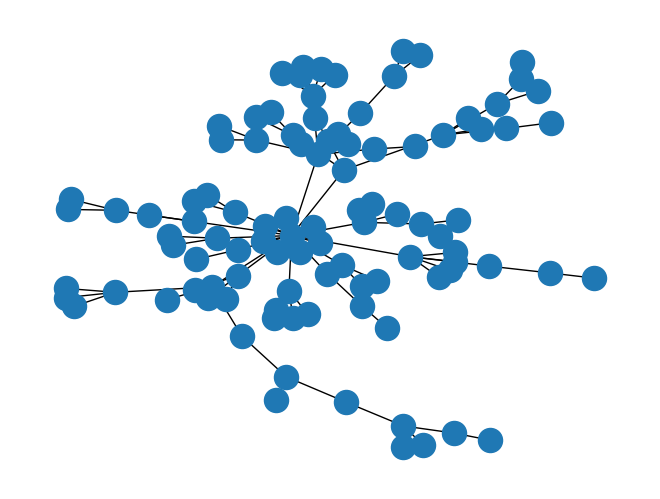

In [164]:
# Plot network 
nx.draw(G)

### B. Create a 5000 node network

In [165]:
# Create network with 5000 nodes
G = createBAmodel(5000)
k = [y for (x,y) in G.degree] # Get all degrees

Q: What is the maximum and minimum degree?

In [166]:
# Max and min degree
print("max: {0}, min: {1}".format(max(k), min(k)))

max: 108, min: 1


A: As seen in the code above we have computed the minimum degree to be 1 and the maximum to be 157. The minimum degree will in this special case network always be 1 since the last added node will always only be connected to 1 other node in the network, while the maximum will change for every time we create a new network.

Q: Now bin the degree distribution, for example using numpy.histogram

In [167]:
# Binning degree distribution into 200 bins
hist, bin_edges = np.histogram(k, bins=200)

Text(0.5, 1.0, 'Figure 2. Distribution of degree k')

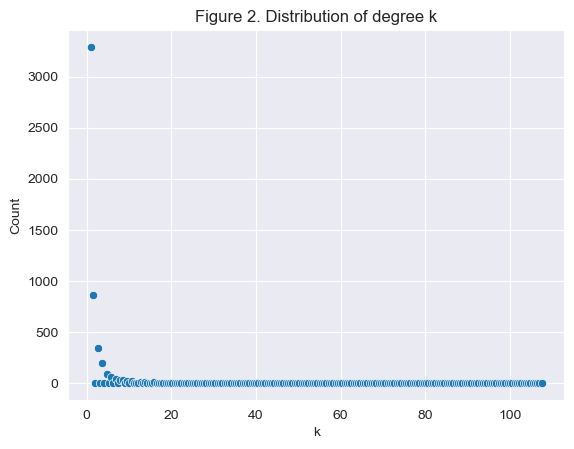

In [168]:
# Plot distribution
sns.scatterplot(y=hist, x=bin_edges[:-1])
plt.xlabel("k")
plt.ylabel("Count")
plt.title("Figure 2. Distribution of degree k")

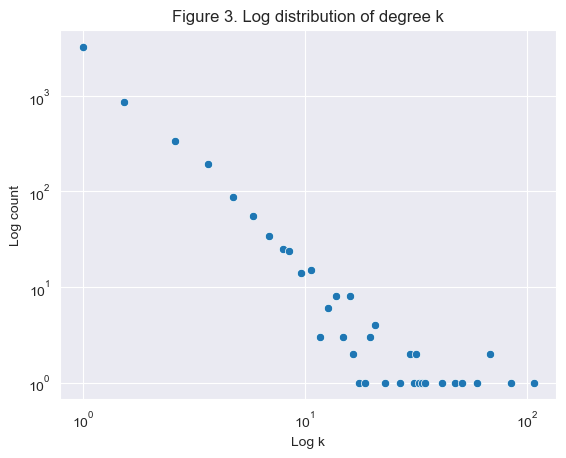

In [169]:
# Plot log degree distribution
sns.scatterplot(y=hist, x=bin_edges[:-1])
plt.xlabel("Log k")
plt.ylabel("Log count")
plt.title("Figure 3. Log distribution of degree k")
plt.yscale('log')
plt.xscale('log')

In figure 2 and 3 we have plotted the distribution of the degree k on both on a linear and logarithmic axis. 

## Part 5. Power-laws and the friendship paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone has fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network F-BA for friendship BA). Do the following:

### A. The friendship paradox in BA networks

A random node is picked using `random.choice`

In [170]:
G_nodes = list(G.nodes) # create list of nodes
i = random.choice(G_nodes) # chose a random node from the list of nodes
print("Random node (i):", i)

Random node (i): 605


* Find $i$'s [neighbors](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.

$i$'s neighbors is found using `G.neighbors` then each neighbors degree is added to the accumulated degree of which the average degree is computed:

In [171]:
accumulated_degree = 0
neighbors = list(G.neighbors(i)) # list neighbors
for neighbor in neighbors: # for each of i's neighbors
    accumulated_degree += G.degree()[neighbor] # add this neigbors degree to the accumulated degree

average_degree = accumulated_degree / len(neighbors)

print("Average degree of i's neighbors: ", average_degree)

Average degree of i's neighbors:  3.2857142857142856


* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than .

Now the degree (amount of friends) of $i$ is compared to the average degree of $i$'s neighbors (average amount of friends friends)

In [172]:
print("i's friends (on average) have more friends than i:", G.degree()[i] < average_degree)

i's friends (on average) have more friends than i: False


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

Now the friendship paradox is tested 1000 times

In [173]:
count = 0

G_nodes = list(G.nodes) # create list of nodes

# how many out of those 1000 times is the friendship paradox true
for k in range(1000):
    # pick a node i at random
    i = random.choice(G_nodes) # chose a random node from the list of nodes

    # compute Find i's neighbor and calculate their average degree
    accumulated_degree = 0
    neighbors = list(G.neighbors(i)) # list neighbors
    for neighbor in neighbors: # for each of i's neighbors
        accumulated_degree += G.degree()[neighbor] # add this neigbors degree to the accumulated degree
    
    average_degree = accumulated_degree / len(neighbors)

    if G.degree()[i] < average_degree: # compare
        count += 1
        
print("Out of those 1000 times the friendship paradox is true", count, "times.")

Out of those 1000 times the friendship paradox is true 849 times.


### B. The friendship paradox more generally

* What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower?
    - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?

**_Durita and Frederik please have a look at this..._**
> It will be slightly lower because there are fewer highly connected hubs and even more nodes with only very few links.

*@fvs: suggestion*

> The fraction of times the paradox is true will be slightly lower if the power law distribution is flatter as the connections will be slightly less unevenly distributed meaning fewer highly connected hubs and more nodes with few links.

- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

In [174]:
n = 5000
gamma = 2.5


def create_powerlaw_degree_sequence():
    # TODO also not sure whether I am allowed to use this function
    degree_sequence = [round(d) for d in nx.utils.powerlaw_sequence(n, gamma)]
    # If sum is odd, pick a random element and add 1 to it
    if sum(degree_sequence) % 2 == 1:
        degree_index_to_adjust = random.randint(0, n - 1)
        degree_sequence[degree_index_to_adjust] += 1
    return degree_sequence


degree_sequence = create_powerlaw_degree_sequence()
G = nx.configuration_model(create_powerlaw_degree_sequence())

- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

In [175]:
# how many out of those 1000 times is the friendship paradox true
def test_friendship_paradox(graph, number_of_tests):
    count = 0

    G_nodes = list(graph.nodes)  # create list of nodes

    for k in range(number_of_tests):
        # pick a node i at random
        i = random.choice(G_nodes)  # chose a random node from the list of nodes

        # compute Find i's neighbor and calculate their average degree
        accumulated_degree = 0
        neighbors = list(graph.neighbors(i))  # list neighbors
        for neighbor in neighbors:  # for each of i's neighbors
            accumulated_degree += graph.degree()[neighbor]  # add this neigbors degree to the accumulated degree

        average_degree = accumulated_degree / len(neighbors)

        if graph.degree()[i] < average_degree:  # compare
            count += 1

    print(f"Out of those {number_of_tests} times the friendship paradox is true {count} times.")

test_friendship_paradox(G, 1000)

Out of those 1000 times the friendship paradox is true 838 times.


- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in 5.A above*; let's call this new network **F-CM** (for *friendship configuration model*).
    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
        * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
        * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)"

> answer...

## Part 6. Growth without Preferential Attachment

Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment.

In [176]:
# Create BAsune network function
def createBASunemodel(n):
    """
    n: Number of nodes

    Steps: 
    1. Start with small network
    2. Place a new node next to the network
    3. Add a link between new node and one selected node from the network  with probability proportional to it's degree
    4. Repeat 2 and 3 until reached n nodes

    """

    # Initialize network
    G = nx.Graph()
    G.add_edge(0, 1)  # add a single link
    
    # Target nodes for new edges
    targets=list(range(2))
    
    # List of existing nodes, with nodes repeated once for each adjacent edge
    #repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=2
    while source<n:
        # Add link from source to node with probability proportional to it's degree
        G.add_edge(source, random.choice(targets))

        # New target list
        targets = list(G.nodes) # Targets of equal probability

        source += 1

    return G

In [177]:
BAsune = createBASunemodel(5000)
k = [y for (x,y) in BAsune.degree] # Get all degrees

Now we have the BA sune network.

Generate an ER network of same size and same p as the Sune-network.

First we need to compute p which is the probability of an edge between all unique pairs of nodes. To compute it, we need the number of unique pairs and the number of nodes. We compute the number of unique pairs in the following code section:

In [178]:
# Compute number of unique pairs in BA model
uniquepairs = 5000*(5000-1)/2

We now have the number of unique pairs and can define the ER network:

In [179]:
# Erdos model
N = 5000
p = 5000/uniquepairs # Number of nodes diveded by number of unique pairs, then we get the probability of edge in the BA model
er_network = nx.erdos_renyi_graph(N, p)
kER = [y for (x,y) in er_network.degree] # Get all degrees

What are the differences between the ER network and the Sune-network? Explain in your own words

We then plot the distribution of the degree k for both the ER and the BA sune network: 

/Users/peern/.conda/envs/course02805social/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 4. Distribution of degree k')

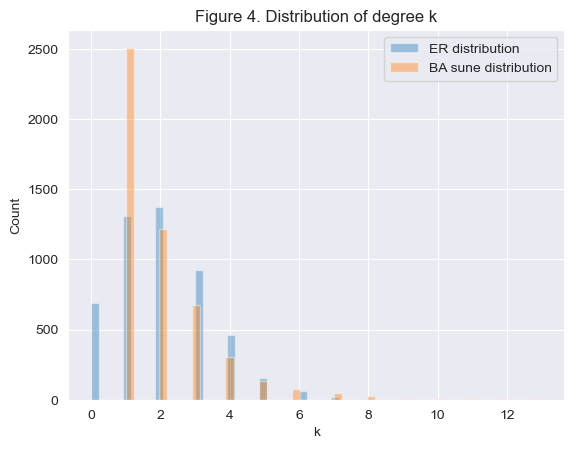

In [180]:
# Plot distribution
#sns.scatterplot(y=histER, x=bin_edgesER[:-1])
sns.distplot(kER,kde=False, label='ER distribution')
sns.distplot(k,kde=False, label='BA sune distribution')
plt.legend()
plt.xlabel("k")
plt.ylabel("Count")
plt.title("Figure 4. Distribution of degree k")

Compute number connected components

In [181]:
print("Number connected components for ER model: {0} and for BAsune model: {1}".format(
    nx.number_connected_components(er_network),
    nx.number_connected_components(BAsune)
))

Number connected components for ER model: 820 and for BAsune model: 1


One of the main differences between the ER and the special case BAsune network is, that in the BAsune model all nodes will always be connected. This is because every time a new node is added to the network is selects one of the existing nodes to connect to, i.e. insuring that all nodes will be connected at least once (one edge) to the network. This is however not the case with the ER network. The ER network assigns links from the new node to all existing nodes with a probability p, meaning that it could in the extremes potentially connect to all existing nodes or to none. This is seen in figure 4, where we see that the ER model has multiple nodes which are connected to none of the other nodes while for the BAsune network each node at least is linked to one other existing nodes. 

For the BAsune model this means that there will always be a path from one arbitrary node to another, on the other hand with the ER network there can exist multiple small networks and you are not with certainty reach all other nodes. This is also seen in the computation in the code block above where the ER model has 825 connected components while BAsune has 1. For BAsune there will always be 1 connected component while for ER it can fluctuate.